In [ ]:
import numpy as np 
import plotly.offline as py
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
!pip install sweetviz

In [ ]:
url = 'https://raw.githubusercontent.com/EliasLopezBouzid/EliasLopezBouzid/main/ProyectS%20-%20Data.csv'
df = pd.read_csv(url, quotechar='"')
df = df.replace({ "..": np.nan})
df = df.dropna(subset=['GDP'])


df['Country'] = df['Country'].astype('category')
#df.loc[:,'Year'] = pd.to_datetime(df['Year'],format='%Y').dt.year
df.drop(['GDP'], axis=1, inplace=True)

df['Population'] = (df['Population'].astype('int'))
df['Labor force'] = (df['Labor force'].astype('float'))
df['GDP per capita'] = (df['GDP per capita'].astype('float'))


df['Population'] = (df['Population'] / 1000000)
df['Labor force'] = (df['Labor force'] / 1000000)
df['GDP per capita'] = (df['GDP per capita'] / 1000)


#Cogemos todas las demas columnas, que son %
s = df.select_dtypes(include='object').columns
df[s] = df[s].astype("float")
df[s] = (df[s] / 100)

df.head(100)

,Country,Year,Population,GDP per capita,Labor force,Unemployment,Employers,Agriculture,Industry,Manufacturing,Services,Trade,Gross capital formation,Tax rate,Gross national expenditure,Gross savings,Gross domestic savings,Consumer price index,Import value index,Final consumption expenditure,Exports,External balance,Natural resources rents,Gini index,Development expenditure,Health expenditure,Education expenditure,School enrollment primary,School enrollment secondary,School enrollment tertiary,Individuals using the Internet,International migrant stock
0,Spain,1996.0,39.889852,16.109084,16.829562,0.2214,0.0521,0.043890,0.280791,0.163478,0.599060,0.462452,0.222266,NaN,1.001805,0.209996,0.220461,0.690933,0.777210,0.779539,0.230324,-0.001805,0.000593,NaN,0.007875,NaN,NaN,1.047767,1.175732,0.476778,0.013318,NaN
1,Spain,1997.0,40.057389,14.730797,17.156870,0.2070,0.0524,0.043022,0.280647,0.166588,0.595893,0.511663,0.226111,NaN,0.998267,0.220687,0.227844,0.704552,0.742684,0.772156,0.256698,0.001733,0.000527,NaN,0.007778,NaN,NaN,1.042829,1.151843,0.505477,0.028033,NaN
2,Spain,1998.0,40.223509,15.394351,17.432865,0.1867,0.0519,0.041504,0.278475,0.165525,0.593301,0.526615,0.239271,NaN,1.004576,0.227011,0.234695,0.717476,0.876545,0.765305,0.261019,-0.004576,0.000422,NaN,0.008480,NaN,NaN,1.044210,1.060980,0.528337,0.043619,NaN
3,Spain,1999.0,40.386875,15.715332,17.758807,0.1548,0.0600,0.038174,0.278950,0.162997,0.591745,0.546365,0.255377,NaN,1.019334,0.222883,0.236043,0.734052,0.869770,0.763957,0.263515,-0.019334,0.000390,NaN,0.008385,NaN,0.901901,1.045467,1.078069,0.550277,0.070850,NaN
4,Spain,2000.0,40.567864,14.713066,18.277071,0.1379,0.0563,0.037453,0.279692,0.162326,0.591996,0.600823,0.266404,NaN,1.029556,0.223276,0.236848,0.759256,1.000000,0.763152,0.285634,-0.029556,0.000500,0.343,0.008828,0.067992,0.910499,1.045031,1.102660,0.577271,0.136250,0.040670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,American Samoa,2003.0,0.059495,8.807463,NaN,NaN,NaN,NaN,NaN,0.206107,NaN,2.074427,NaN,NaN,NaN,NaN,-0.055344,NaN,1.207312,1.055344,0.979008,-0.116412,0.000000,NaN,0.001868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,American Samoa,2004.0,0.059684,8.528249,NaN,NaN,NaN,NaN,NaN,0.155206,NaN,2.023576,NaN,NaN,NaN,NaN,-0.147348,NaN,1.163043,1.147348,0.903733,-0.216110,0.000000,NaN,0.003234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,American Samoa,2005.0,0.059557,8.395319,NaN,NaN,NaN,NaN,NaN,0.136000,NaN,2.232000,NaN,NaN,NaN,NaN,-0.182000,NaN,1.000395,1.182000,0.996000,-0.240000,0.000000,NaN,0.003647,NaN,NaN,NaN,NaN,NaN,NaN,0.409916
110,American Samoa,2006.0,0.059109,8.340523,NaN,NaN,NaN,NaN,NaN,0.135903,NaN,2.298174,NaN,NaN,NaN,NaN,-0.215010,NaN,1.117984,1.215010,1.004057,-0.290061,0.000000,NaN,0.003931,NaN,0.937654,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
df[["Country"]] = ordinal_encoder.fit_transform(df[["Country"]])

df.head(100)

,Country,Year,Population,GDP per capita,Labor force,Unemployment,Employers,Agriculture,Industry,Manufacturing,Services,Trade,Gross capital formation,Tax rate,Gross national expenditure,Gross savings,Gross domestic savings,Consumer price index,Import value index,Final consumption expenditure,Exports,External balance,Natural resources rents,Gini index,Development expenditure,Health expenditure,Education expenditure,School enrollment primary,School enrollment secondary,School enrollment tertiary,Individuals using the Internet,International migrant stock
0,176.0,1996.0,39.889852,16.109084,16.829562,0.2214,0.0521,0.043890,0.280791,0.163478,0.599060,0.462452,0.222266,NaN,1.001805,0.209996,0.220461,0.690933,0.777210,0.779539,0.230324,-0.001805,0.000593,NaN,0.007875,NaN,NaN,1.047767,1.175732,0.476778,0.013318,NaN
1,176.0,1997.0,40.057389,14.730797,17.156870,0.2070,0.0524,0.043022,0.280647,0.166588,0.595893,0.511663,0.226111,NaN,0.998267,0.220687,0.227844,0.704552,0.742684,0.772156,0.256698,0.001733,0.000527,NaN,0.007778,NaN,NaN,1.042829,1.151843,0.505477,0.028033,NaN
2,176.0,1998.0,40.223509,15.394351,17.432865,0.1867,0.0519,0.041504,0.278475,0.165525,0.593301,0.526615,0.239271,NaN,1.004576,0.227011,0.234695,0.717476,0.876545,0.765305,0.261019,-0.004576,0.000422,NaN,0.008480,NaN,NaN,1.044210,1.060980,0.528337,0.043619,NaN
3,176.0,1999.0,40.386875,15.715332,17.758807,0.1548,0.0600,0.038174,0.278950,0.162997,0.591745,0.546365,0.255377,NaN,1.019334,0.222883,0.236043,0.734052,0.869770,0.763957,0.263515,-0.019334,0.000390,NaN,0.008385,NaN,0.901901,1.045467,1.078069,0.550277,0.070850,NaN
4,176.0,2000.0,40.567864,14.713066,18.277071,0.1379,0.0563,0.037453,0.279692,0.162326,0.591996,0.600823,0.266404,NaN,1.029556,0.223276,0.236848,0.759256,1.000000,0.763152,0.285634,-0.029556,0.000500,0.343,0.008828,0.067992,0.910499,1.045031,1.102660,0.577271,0.136250,0.040670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3.0,2003.0,0.059495,8.807463,NaN,NaN,NaN,NaN,NaN,0.206107,NaN,2.074427,NaN,NaN,NaN,NaN,-0.055344,NaN,1.207312,1.055344,0.979008,-0.116412,0.000000,NaN,0.001868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,3.0,2004.0,0.059684,8.528249,NaN,NaN,NaN,NaN,NaN,0.155206,NaN,2.023576,NaN,NaN,NaN,NaN,-0.147348,NaN,1.163043,1.147348,0.903733,-0.216110,0.000000,NaN,0.003234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,3.0,2005.0,0.059557,8.395319,NaN,NaN,NaN,NaN,NaN,0.136000,NaN,2.232000,NaN,NaN,NaN,NaN,-0.182000,NaN,1.000395,1.182000,0.996000,-0.240000,0.000000,NaN,0.003647,NaN,NaN,NaN,NaN,NaN,NaN,0.409916
110,3.0,2006.0,0.059109,8.340523,NaN,NaN,NaN,NaN,NaN,0.135903,NaN,2.298174,NaN,NaN,NaN,NaN,-0.215010,NaN,1.117984,1.215010,1.004057,-0.290061,0.000000,NaN,0.003931,NaN,0.937654,NaN,NaN,NaN,NaN,NaN


In [ ]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.describe()

,Country,Year,Population,GDP per capita,Labor force,Unemployment,Employers,Agriculture,Industry,Manufacturing,Services,Trade,Gross capital formation,Tax rate,Gross national expenditure,Gross savings,Gross domestic savings,Consumer price index,Import value index,Final consumption expenditure,Exports,External balance,Natural resources rents,Gini index,Development expenditure,Health expenditure,Education expenditure,School enrollment primary,School enrollment secondary,School enrollment tertiary,Individuals using the Internet,International migrant stock
count,5096.000000,5096.000000,5096.000000,5096.000000,4525.000000,4525.000000,4349.000000,4675.000000,4651.000000,4480.000000,4561.000000,4459.000000,4225.000000,2659.000000,4205.000000,3693.000000,4279.000000,4349.000000,4653.000000,4279.000000,4459.000000,4459.000000,4817.000000,1486.000000,1981.000000,3517.000000,1477.000000,3798.000000,3217.000000,2924.000000,4515.000000,815.000000
mean,105.680338,2008.125196,32.818718,14.049841,16.719688,0.080587,0.032406,0.121387,0.261555,0.123261,0.540918,0.893932,0.238457,0.445573,1.045584,0.224832,0.189282,0.971260,2.656990,0.810718,0.417909,-0.058114,0.064717,0.381328,0.009255,0.062345,0.905987,1.022988,0.797258,0.356186,0.292627,0.106473
std,61.424181,7.144549,129.025163,22.365251,67.279440,0.060726,0.024050,0.118442,0.121383,0.071506,0.128670,0.576100,0.084475,0.335407,0.177146,0.156806,0.184493,0.694983,2.147229,0.184493,0.314273,0.188259,0.109252,0.088550,0.009354,0.027483,0.079601,0.147106,0.298129,0.268571,0.300195,0.154037
min,0.000000,1996.000000,0.009317,0.102598,0.031205,0.001100,0.000000,0.000136,0.031502,0.000000,0.108591,0.000269,-0.024244,0.074000,0.401108,-0.199030,-1.368596,0.000297,0.254042,0.121732,0.000092,-1.647660,0.000000,0.237000,0.000054,0.010252,0.328100,0.280083,0.052834,0.000923,0.000000,0.000400
25%,53.000000,2002.000000,0.979183,1.311415,1.008427,0.037400,0.012200,0.027906,0.183764,0.072161,0.452838,0.541185,0.188823,0.307000,0.968094,0.151537,0.097340,0.741041,1.091927,0.717783,0.226196,-0.131609,0.001184,0.313000,0.002363,0.042736,0.882148,0.981355,0.601687,0.116360,0.026118,0.013949
50%,106.000000,2008.000000,5.986085,4.414585,3.375155,0.064300,0.029800,0.081389,0.244545,0.117768,0.540495,0.785486,0.228880,0.391000,1.029646,0.210936,0.200350,0.956971,1.929157,0.799650,0.348000,-0.034699,0.014828,0.360000,0.005658,0.057764,0.922831,1.026254,0.870178,0.302855,0.173000,0.041028
75%,158.000000,2014.000000,20.452627,17.479322,9.637433,0.107700,0.046200,0.185668,0.309463,0.163627,0.625731,1.075580,0.276446,0.491000,1.119777,0.277410,0.282217,1.109580,3.449361,0.902660,0.523277,0.028666,0.077606,0.439000,0.012988,0.079184,0.954726,1.092153,1.001256,0.558963,0.532996,0.122830
max,212.000000,2020.000000,1410.929362,190.512737,792.758868,0.379600,0.178800,0.790424,0.877969,0.498794,0.962049,8.631951,0.794011,3.391000,2.647660,3.729882,0.878268,33.648199,19.095865,2.368596,4.338360,0.598889,0.874593,0.658000,0.049408,0.242439,1.000000,1.656454,1.639347,1.485309,1.000000,0.884040


In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


imp = IterativeImputer()


# Introduce IterativeImputer with an estimator
imp = IterativeImputer(estimator=RandomForestRegressor())
# Fit to the dataset containing missing values
imp.fit(df)
# Transform the dataset containing missing values
df = pd.DataFrame(imp.transform(df), columns = df.columns)
df.to_csv('filled_data.csv', index=False)
df.head(100)

,Country,Year,Population,GDP per capita,Labor force,Unemployment,Employers,Agriculture,Industry,Manufacturing,Services,Trade,Gross capital formation,Tax rate,Gross national expenditure,Gross savings,Gross domestic savings,Consumer price index,Import value index,Final consumption expenditure,Exports,External balance,Natural resources rents,Gini index,Development expenditure,Health expenditure,Education expenditure,School enrollment primary,School enrollment secondary,School enrollment tertiary,Individuals using the Internet,International migrant stock
0,176.0,1996.0,39.889852,16.109084,16.829562,0.221400,0.052100,0.043890,0.280791,0.163478,0.599060,0.462452,0.222266,0.55320,1.001805,0.209996,0.220461,0.690933,0.777210,0.779539,0.230324,-0.001805,0.000593,0.37110,0.007875,0.069402,0.897294,1.047767,1.175732,0.476778,0.013318,0.061157
1,176.0,1997.0,40.057389,14.730797,17.156870,0.207000,0.052400,0.043022,0.280647,0.166588,0.595893,0.511663,0.226111,0.54378,0.998267,0.220687,0.227844,0.704552,0.742684,0.772156,0.256698,0.001733,0.000527,0.37484,0.007778,0.068235,0.874109,1.042829,1.151843,0.505477,0.028033,0.057217
2,176.0,1998.0,40.223509,15.394351,17.432865,0.186700,0.051900,0.041504,0.278475,0.165525,0.593301,0.526615,0.239271,0.55739,1.004576,0.227011,0.234695,0.717476,0.876545,0.765305,0.261019,-0.004576,0.000422,0.35586,0.008480,0.069279,0.908469,1.044210,1.060980,0.528337,0.043619,0.054841
3,176.0,1999.0,40.386875,15.715332,17.758807,0.154800,0.060000,0.038174,0.278950,0.162997,0.591745,0.546365,0.255377,0.57665,1.019334,0.222883,0.236043,0.734052,0.869770,0.763957,0.263515,-0.019334,0.000390,0.35357,0.008385,0.069227,0.901901,1.045467,1.078069,0.550277,0.070850,0.053139
4,176.0,2000.0,40.567864,14.713066,18.277071,0.137900,0.056300,0.037453,0.279692,0.162326,0.591996,0.600823,0.266404,0.57923,1.029556,0.223276,0.236848,0.759256,1.000000,0.763152,0.285634,-0.029556,0.000500,0.34300,0.008828,0.067992,0.910499,1.045031,1.102660,0.577271,0.136250,0.040670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.0,2003.0,0.059495,8.807463,0.050631,0.108653,0.037844,0.137548,0.283056,0.206107,0.580717,2.074427,0.150482,0.52712,1.129739,0.158894,-0.055344,0.714341,1.207312,1.055344,0.979008,-0.116412,0.000000,0.45505,0.001868,0.057433,0.901390,1.124897,0.854254,0.213586,0.265547,0.197020
96,3.0,2004.0,0.059684,8.528249,0.047680,0.097827,0.033631,0.131298,0.242751,0.155206,0.615723,2.023576,0.191471,0.56153,1.240087,0.158505,-0.147348,0.714112,1.163043,1.147348,0.903733,-0.216110,0.000000,0.45593,0.003234,0.094030,0.894813,1.170293,0.875589,0.223940,0.282314,0.235699
97,3.0,2005.0,0.059557,8.395319,0.047800,0.107997,0.031989,0.131087,0.220356,0.136000,0.613896,2.232000,0.191379,0.35791,1.238652,0.151319,-0.182000,0.751390,1.000395,1.182000,0.996000,-0.240000,0.000000,0.44561,0.003647,0.090148,0.892235,1.118365,0.917797,0.359046,0.285083,0.409916
98,3.0,2006.0,0.059109,8.340523,0.047752,0.105229,0.036193,0.129640,0.219384,0.135903,0.620987,2.298174,0.208363,0.55499,1.299418,0.138228,-0.215010,0.747646,1.117984,1.215010,1.004057,-0.290061,0.000000,0.45085,0.003931,0.096211,0.937654,1.168959,0.909862,0.374176,0.302265,0.279824


In [ ]:
df[["Country"]] = ordinal_encoder.inverse_transform(df[["Country"]])

country_list = ['Afghanistan','Angola','Albania','Argentina','Armenia','Australia' ,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','North America','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand   ','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Venezuela, RB','Vietnam','Yemen, Rep.','South Africa','Congo, Dem. Rep.','Zambia','Zimbabwe'
]

country_clean = df[df['Country'].isin(country_list)]
selec = country_clean.loc[country_clean["Year"] == 2019]

metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
        locations = selec['Country'].values,
        z = selec['GDP per capita'].values,
        locationmode = 'country names',
        text = selec['Country'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'GDPpC\nRate')
            )
       ]

layout = dict(
    title = 'World Map of Global GDP per capita in US$',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

In [ ]:
df.dtypes


Country                            object
Year                              float64
Population                        float64
GDP per capita                    float64
Labor force                       float64
Unemployment                      float64
Employers                         float64
Agriculture                       float64
Industry                          float64
Manufacturing                     float64
Services                          float64
Trade                             float64
Gross capital formation           float64
Tax rate                          float64
Gross national expenditure        float64
Gross savings                     float64
Gross domestic savings            float64
Consumer price index              float64
Import value index                float64
Final consumption expenditure     float64
Exports                           float64
External balance                  float64
Natural resources rents           float64
Gini index                        

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

X = df.copy()
# Remove target
y = X.pop('GDP per capita')
countries = X["Country"]

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)



X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing


# stratify - make sure countries are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=countries, train_size=0.75)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

pd.DataFrame(X[:10,:]).head()

Input shape: [243]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242
0,-1.697292,0.054810,0.031056,2.362025,0.810345,-0.624817,0.176875,0.622053,0.387507,-0.813226,-0.266306,0.099516,-0.336559,-0.097153,0.184205,-0.423855,-0.904647,-0.184219,-0.643180,0.340162,-0.585945,-0.305842,0.224575,0.277015,0.063412,0.169421,1.333023,0.598955,-0.973561,-0.317562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.557311,0.056108,0.036202,2.116409,0.823499,-0.632236,0.175701,0.665907,0.363670,-0.722381,-0.221904,0.072676,-0.355897,-0.029291,0.227883,-0.403151,-0.920816,-0.227897,-0.553510,0.359691,-0.586547,-0.248675,0.211173,0.231638,-0.305921,0.132781,1.251255,0.713078,-0.924670,-0.347128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.417331,0.057396,0.040541,1.770159,0.801576,-0.645218,0.158037,0.650920,0.344162,-0.694779,-0.069925,0.111454,-0.321416,0.010850,0.268416,-0.383503,-0.858130,-0.268429,-0.538817,0.324870,-0.587518,-0.538789,0.308008,0.272232,0.241416,0.143033,0.940248,0.803980,-0.872885,-0.364969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.277350,0.058662,0.045665,1.226051,1.156723,-0.673698,0.161903,0.615268,0.332454,-0.658320,0.116071,0.166330,-0.240750,-0.015352,0.276386,-0.358303,-0.861302,-0.276399,-0.530332,0.243410,-0.587812,-0.573792,0.294909,0.270218,0.136793,0.152357,0.998742,0.891223,-0.782406,-0.377743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.137370,0.060065,0.053813,0.937793,0.994496,-0.679861,0.167939,0.605807,0.334342,-0.557786,0.243410,0.173681,-0.184883,-0.012859,0.281148,-0.319986,-0.800316,-0.281162,-0.455132,0.186992,-0.586803,-0.735357,0.355880,0.222200,0.273768,0.149119,1.082912,0.998563,-0.565111,-0.471332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


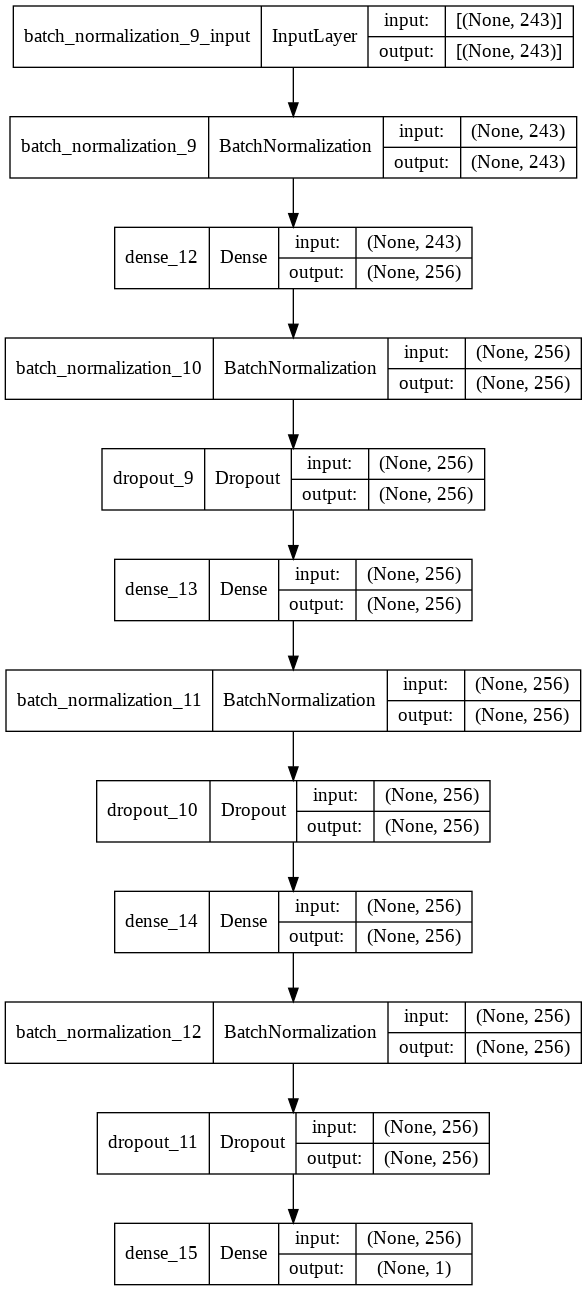

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#DEFINE MODEL
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.3),   
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1),
])


from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Minimum validation loss: 0.09867160022258759


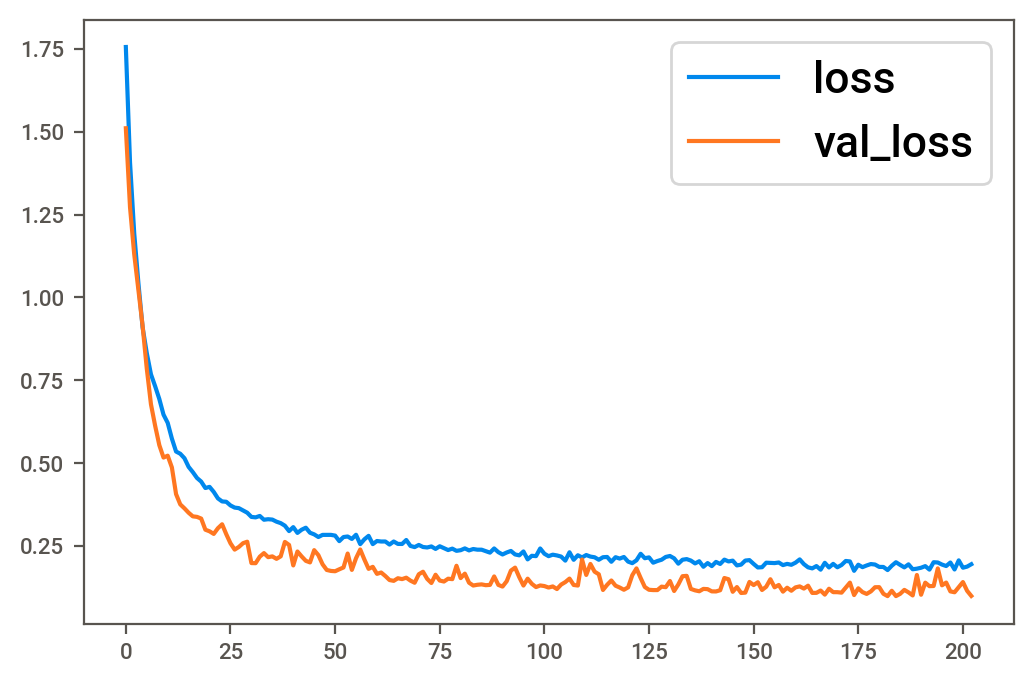

In [ ]:
#ADD LOSS AND OPTIMIZER
model.compile(
    optimizer='adam',
    loss='mae')

#Define Early Stopping

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#TRAIN THE MODEL
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)




history_df = pd.DataFrame(history.history)
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 243)              972       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 256)               62464     
                                                                 
 batch_normalization_10 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_11 (Bat  (None, 256)             